# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_1samp

df = pd.read_csv('data/human_body_temperature.csv')

In [132]:
df.head(),df.shape

(   temperature gender  heart_rate
 0         99.3      F        68.0
 1         98.4      F        81.0
 2         97.8      M        73.0
 3         99.2      F        66.0
 4         98.0      F        73.0, (130, 3))

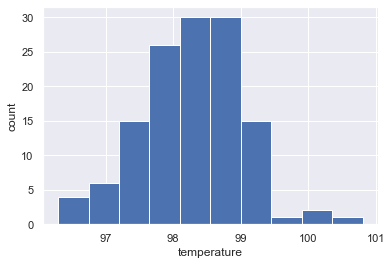

(98.24923076923078, 0.7303577789050377)

In [133]:
temp_df = df['temperature']
plt.hist(temp_df)
plt.xlabel('temperature')
plt.ylabel('count')
plt.show()
np.mean(temp_df),np.std(temp_df)

In [92]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

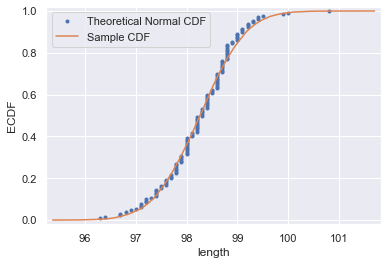

In [136]:

mean_temp = np.mean(temp_df)
std_temp = np.std(temp_df)
temp_samples = np.random.normal(mean_temp, std_temp, size=10000)

x_temp, y_temp = ecdf(temp_df)
x_theor, y_theor = ecdf(temp_samples)

# Generate plot
plt.plot(x_temp, y_temp,marker = '.',linestyle = 'none')
plt.plot(x_theor, y_theor)

# Label the axes

plt.xlabel('length')
plt.ylabel('ECDF')
plt.legend(['Theoretical Normal CDF', 'Sample CDF'])
plt.margins(0.02)

sns.set()
# Display the plot
plt.show()

In [137]:
k2,p=stats.normaltest(temp_df)
p

0.2587479863488254

If the p value is less than our alpha (significance value), we can reject the hypothesis that this sample data is normally distributed. If greater, we cannot reject the null hypothesis and must conclude the data is normally distributed. 

# 1. Is the distribution of body temperatures normal?

  **Yes,The distribution of the data (the histogram) is bell-shaped and resemble the normal distribution and also ECDF of body     temperatures from the sample data(blue dots) is very closely aligned with the ECDF of a presumed normal distribution (using     the sample mean and standard deviation)**

# 2. Is the sample size large? Are the observations independent?
   **yes, sample size is 130 and greater than 30 and consider as a size large and each random variable in this sample and            population measures the temperature of a human and are independent observations.**
     

# 3. Is the true population mean really 98.6 degrees F?

    1. Specify Ho,Ha
       H0 : The true population mean is 98.6
       Ha : The true population mean is not equal 98.6
    2. Test Statistic : mean
    3. Generate many sets of simulated data assuming Ho is true
    4. Compute Test Statistic for each set
    5. p_value
    
  **I try bootstrapping with one-sample test because we compare the mean of our sample data to a known value (98.6)**

In [98]:
normal_temp_value = 98.6  #F
temp_df_shifted = temp_df - np.mean(temp_df) + normal_temp_value
diff_obs = np.mean(temp_df_shifted) - normal_temp_value

bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(temp_df_shifted, size=len(temp_df_shifted)))
    
p_value = np.sum( bs_replicates <= np.mean(temp_df) ) / len(bs_replicates)
p_value

0.0

**p_value 0 means Ho is Statistically Significant and reject the null hypothesis**

 **It is appropriate to use the 𝑧  statistic since the sample size more than 30 and we know the true population mean and we use    one-sample since as we deal with a single mean 98.6**

Now we perform one sample permutation test

In [126]:
ztest ,pval = stests.ztest(temp_df, x2=None, value=98.6)
z_val= (mean_temp - 98.6 ) / (std_temp/np.sqrt(130))

z_val,ztest,pval

(-5.475925202078116, -5.4548232923645195, 4.9021570141012155e-08)

**The Z-Statistic is 5 with a p-value of 4.9021570141012155e-08 and that p-value for the one-sample z-test is sufficiently small ( 4.9021570141012155e-08 ), we reject the null hypothesis.**

In [128]:
tset, pval = ttest_1samp(temp_df, 98.6)

tset,pval

(-5.4548232923645195, 2.4106320415561276e-07)

**The t-Statistic is 5 with a p-value of 2.4106320415561276e-07 and that p-value for the one-sample t-test is sufficiently small ( 2.4106320415561276e-07 ), we reject the null hypothesis.**

# Comparing the t-score to z-score

The p-value from the z-test is more smaller than the p-value from the t-test. It means very improbable that we would observe a population mean greater than 98.6.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [162]:
sample_10 = small_sample = np.random.choice(df['temperature'], size=10, replace=False)

In [163]:
ztest ,pval = stests.ztest(sample_10, x2=None, value=98.6)
z_val= (mean_temp - 98.6 ) / (std_temp/np.sqrt(130))

z_val,ztest,pval

(-5.475925202078116, -3.031895830904478, 0.002430230548005161)

In [164]:
tset, pval = ttest_1samp(sample_10, 98.6)

tset,pval

(-3.031895830904478, 0.014203021370701787)

**The appropriate test to use for a smaller sample size of 10 is be the t-test. z-score is only relevant for sample sizes that are larger than 30.**
**After large number of doing the t-test and z-test on the smaller sample size of 10, keep produces lower p-values from the z-test than from the t-test.**

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

**Bootstrap Approach**

In [179]:
conf_int = np.percentile(bs_replicates,[2.5,97.5])
margin_of_error = 1.96 * bs_replicates.std()
conf_int,margin_of_error

(array([98.47692308, 98.72771154]), 0.125431117424247)

**The 95% confidence interval is from  98.48  to  98.73 .
The margin of error, as computed from the bootstrap replicates, is: 0.125431117424247
Temperatures above and below the confidence interval are considered statistically abnormal.**

**Frequentist Aproach**

In [180]:
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
z_margin_of_error = z_critical * (std_temp/np.sqrt(len(temp_df)))
z_confidence_interval = (mean_temp - z_margin_of_error,
                           mean_temp + z_margin_of_error)
z_confidence_interval,z_margin_of_error

((98.12368211145665, 98.37477942700491), 0.12554865777413815)

**The 95% confidence interval is from  98.12  to  98.37 .
The margin of error, as computed from the z_test method, is: 0.12554865777413815
Temperatures above and below the confidence interval are considered statistically abnormal.**

In [181]:
t_critical = stats.t.ppf(q = 0.975, df=len(temp_df)-1)  # Get the t-critical value*

sigma = temp_df.std(ddof=1)/np.sqrt(len(temp_df)) 
t_margin_of_error = t_critical * sigma

t_confidence_interval = (mean_temp - t_margin_of_error,
                       mean_temp + t_margin_of_error)  
t_confidence_interval,t_margin_of_error

((98.12200290560804, 98.37645863285351), 0.12722786362273047)

**The 95% confidence interval is from 98.12 to 98.37 .
The margin of error, as computed from the t_test method, is: 0.12722786362273047 
Temperatures above and below the confidence interval are considered statistically abnormal.***

# 6. Is there a significant difference between males and females in normal temperature?

In [212]:
gender_df = df[['gender','temperature']]
gender_df = gender_df.groupby(['gender'])['gender','temperature']
gender_df = gender_df.agg({'count','mean'})
gender_df.columns = ['Number of temperature', 'Average of temperature']
gender_df = gender_df.sort_values(['gender','Number of temperature', 'Average of temperature'],ascending=False)
gender_df

,Number of temperature,Average of temperature
gender,,
M,65,98.104615
F,65,98.393846


In [225]:
male_df = df[df.gender == 'M'].temperature
female_df = df[df.gender == 'F'].temperature
male_df.shape,female_df.shape

((65,), (65,))

    1. Specify Ho,Ha
       H0 : The males normal temperature is equal to the females normal temperature.
       Ha : The males normal temperature is not equal to the females normal temperature.
    2. Test Statistic : ECDF
    3. Generate many sets of simulated data assuming Ho is true
    4. Compute Test Statistic for each set
    5. p_value
    
  **I try hypothesis permutation testing with two-sample test**

In [214]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

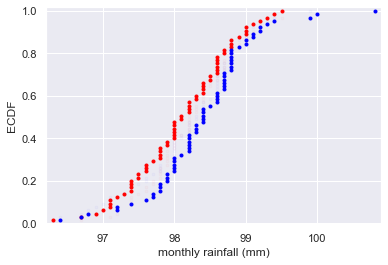

In [240]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(male_df , female_df)

# Compute ECDFs
x_1, y_1 = ecdf(perm_sample_1)
x_2, y_2 = ecdf(perm_sample_2)

# Plot ECDFs of permutation sample
_ = plt.plot(x_1, y_1, marker='.', linestyle='none',
             color='red', alpha=0.02)
_ = plt.plot(x_2, y_2, marker='.', linestyle='none',
             color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(male_df)
x_2, y_2 = ecdf(female_df)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()


**Notice that the permutation samples ECDFs overlap and give a grey haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data and reject null hypothesis, male temperature is not equal to female temperture.**